### Load packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import numpy as np
import pandas as pd
import math
import os

### Set variables

In [2]:
is_savefigs = True

output_path = './'
run_name = 'output'

if is_savefigs :
    fig_path = './figs/'
    if not os.path.exists(fig_path) :
        os.makedirs(fig_path)

## plot stiff potential

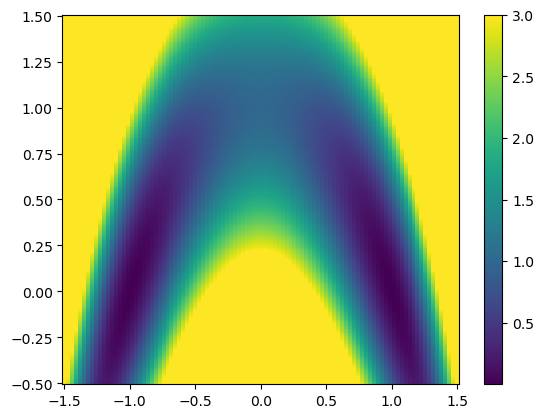

In [5]:
xmin, xmax = -1.5, 1.5
ymin, ymax = -0.5, 1.5
nx = 100
ny = 200
x=np.linspace(xmin, xmax, nx)
y=np.linspace(ymin, ymax, ny)

eps = 0.3
X, Y = np.meshgrid(x,y)

V = (X**2 - 1)**2 + 1/eps * (X**2+Y-1)**2

fig, ax = plt.subplots()
pc = ax.pcolormesh(X,Y,V, vmax=3)
fig.colorbar(pc, ax=ax)

## plot 2d trajectory

Text(0.5, 1.0, 'y')

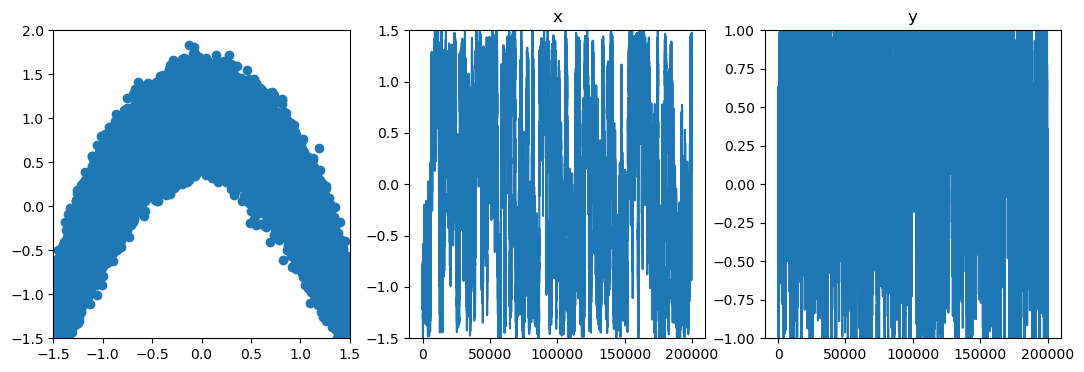

In [7]:
traj_file = '%s/%s.txt' % (output_path, run_name)
traj_raw_data = np.loadtxt(traj_file)
fig, ax = plt.subplots(1,3, figsize=(13, 4))
ax[0].scatter(traj_raw_data[:,1], traj_raw_data[:,2])
ax[0].set_xlim([-1.5, 1.5])
ax[0].set_ylim([-1.5, 2.0])

ax[1].plot(traj_raw_data[:,1], label='x')
ax[1].set_ylim([-1.5, 1.5])
ax[1].set_title('x')

ax[2].plot(traj_raw_data[:,2], label='y')
ax[2].set_ylim([-1.0, 1.0])
ax[2].set_title('y')

### read 2d output
   e.g. *.pmf or *.hist.pmf

In [8]:
prefix = '' #'.hist'
name_list = ['count', 'zcount', 'grad', 'zgrad', 'czar.grad', 'pmf', 'czar.pmf', 'histogram1.dat']
name_id = 6
name = name_list[name_id]
data_file = '%s/%s%s.%s' % (output_path,run_name, prefix, name)
print (data_file)

file = open(data_file, 'r')
line = file.readline()
ncv = int (line.split()[1])
print ('ncv=', ncv)
line = file.readline()
cv1 = [float (x) for x in line.split()[1:]]
print (cv1)
n1 = int (cv1[2]) 
xl = cv1[0]
w= cv1[1]

if ncv == 2 :
    line = file.readline()
    cv2 = [float (x) for x in line.split()[1:]]
    n2 = int (cv2[2])
    yl = cv2[0]
    h = cv2[1]
    print ('cv2:', cv2)        
    gridx = np.loadtxt(data_file, max_rows=n1*n2, usecols=(0)).reshape(n1,n2)
    gridy = np.loadtxt(data_file, max_rows=n1*n2, usecols=(1)).reshape(n1,n2)
else :
    gridx = np.loadtxt(data_file, usecols=(0)).reshape(n1,1)

file.close()   

.//output.czar.pmf
ncv= 1
[-1.525, 0.05, 61.0, 0.0]


In [9]:
# read data
if ncv == 2 :
    if 'grad' in name:
        data_vec = np.loadtxt(data_file, usecols=(2,3)).reshape(-1, n1 * n2, 2)
    else :
        data_vec = np.loadtxt(data_file, usecols=2).reshape(-1, n1 * n2, 1)
else :
    data_vec = np.loadtxt(data_file, usecols=1).reshape(n1,1)
    
print (data_vec.shape)

(61, 1)


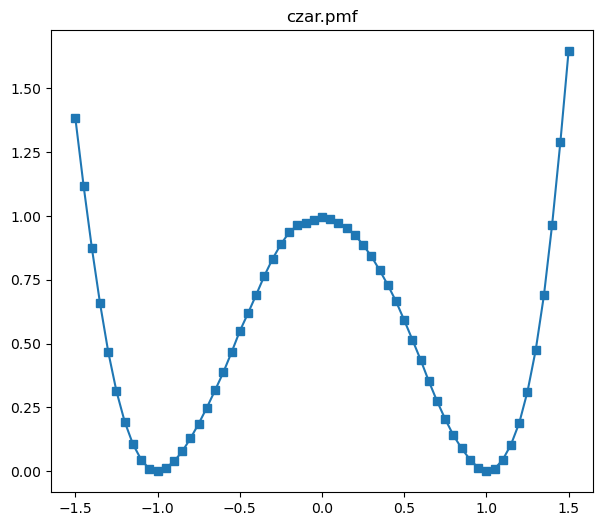

In [10]:
# plot 

fig, ax = plt.subplots(1,1, figsize=(7, 6))

if ncv == 2:
    tidx = -1
    if 'grad' in name :
        U = data_vec[tidx, :, 0].reshape(n1, n2)
        V = data_vec[tidx, :, 1].reshape(n1, n2)
        ax.quiver(gridx, gridy, U, V, angles='xy', scale=1000.0)
        ax.set_xlim(xl, xl+n1*w)
        ax.set_ylim(yl, yl+n2*h)
        ax.set_title(name)
        if is_savefigs:
            fig.savefig('%s/%s_grad_field.png' % (fig_path, run_name))    
    else :
        vmax=data_vec[tidx].max()
        if name in ['count', 'zcount']:
            cnorm = colors.LogNorm(1, vmax)  
        else :
            cnorm = colors.Normalize(0, vmax)

        im = ax.pcolormesh(gridx, gridy, data_vec[tidx,:,0].reshape(n1, n2), cmap=mpl.cm.jet, norm=cnorm)   
        fig.colorbar(im, ax=ax)
        ax.set_title(name)

    xval = 0
    fig, ax = plt.subplots(1,1, figsize=(6, 6))
    idx = int((xval-xl) / w)
    ypos = [yl + h * (i+0.5) for i in range(n2)]
    ax.plot(ypos, data_vec[tidx,:,1].reshape(n1, n2)[idx,:], marker='s')
    ax.set_title(name)
    
else :
    ax.plot(gridx, data_vec[:,0], marker='s')
    ax.set_title(name)


### ABF traj

./output.colvars.traj
['step', 'd', 'r_d']
               step           d         r_d
count  2.000000e+02  200.000000  200.000000
mean   9.950000e+05   -0.001613   -0.007420
std    5.787918e+05    0.907579    0.972311
min    0.000000e+00   -1.402644   -1.766318
25%    4.975000e+05   -0.921369   -0.868685
50%    9.950000e+05    0.058765    0.085860
75%    1.492500e+06    0.870471    0.884560
max    1.990000e+06    1.511028    1.749045
Index(['step', 'd', 'r_d'], dtype='object')


<AxesSubplot: xlabel='step'>

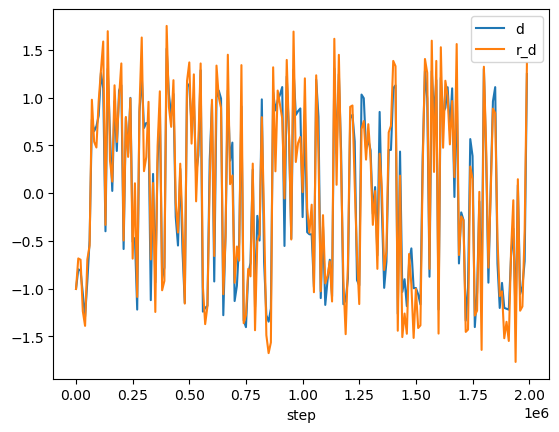

In [11]:
cv_traj_file = './%s.colvars.traj' % (run_name)
print (cv_traj_file)
cv_traj_data = np.loadtxt(cv_traj_file)

line = open(cv_traj_file, 'r').readline()
col_names=line.split()[1:]
print (col_names)
ncol_per_cv = int ((len(col_names) - 1) / 2) 

cv_df = pd.DataFrame(cv_traj_data, columns=col_names)
print (cv_df.describe())
print (cv_df.columns)

cv_df.plot(x='step', y=[col_names[1], col_names[1+ncol_per_cv]])


### For metadynamics

In [ ]:
pmf_file = '%s/%s.pmf' % (output_path, run_name)
pmf_raw_data = np.loadtxt(pmf_file)
file = open(pmf_file, 'r')
line = file.readline()
ncv = int (line.split()[1])
print ('ncv=', ncv)

line = file.readline()
cv1 = [float (x) for x in line.split()[1:]]
n1 = int (cv1[2]) 
line = file.readline()
cv2 = [float (x) for x in line.split()[1:]]
n2 = int (cv2[2])
print (cv1, cv2)
file.close()

vmin=min(pmf_raw_data[:,2])
vmax=10 #max(pmf_raw_data[:,2])
print ("pmf range: [%.1f, %.1f]" % (vmin, vmax))

fig = plt.figure()    
im=plt.pcolormesh(pmf_raw_data[:,0].reshape(n1, n2), pmf_raw_data[:,1].reshape(n1,n2), \
                  pmf_raw_data[:,2].reshape(n1, n2), cmap='jet', vmax=vmax)
plt.title('ABF PMF')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\psi$')
plt.colorbar(im)

### ABF count and pmf

ncv= 1
cv1: [-1.5, 0.05, 60.0, 0.0]
ncv= 1
cv1: [-1.5, 0.05, 60.0, 0.0]
ncv= 1
cv1: [-1.525, 0.05, 61.0, 0.0]


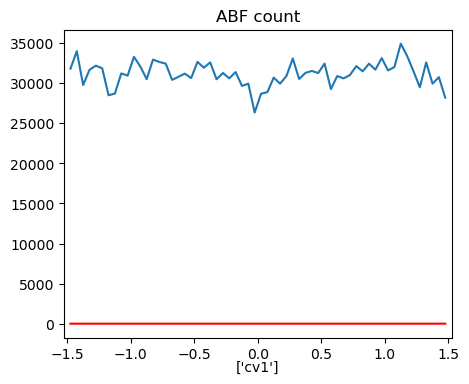

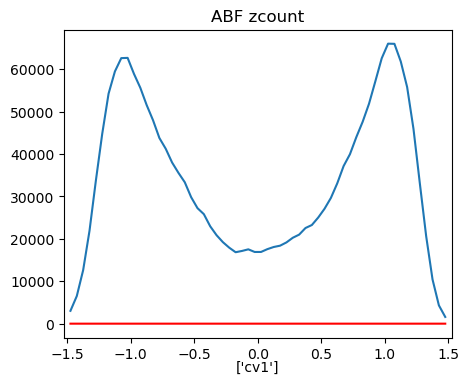

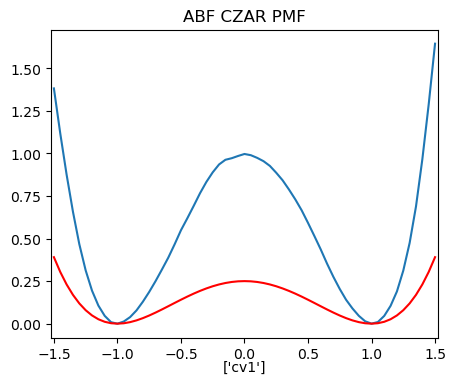

In [12]:
def plot_abf(filename, ax, vmax=-1, log_scale=False, cmap=mpl.cm.jet, cnorm=None):
    file = open(filename, 'r')
    line = file.readline()
    ncv = int (line.split()[1])
    print ('ncv=', ncv)
    line = file.readline()
    cv1 = [float (x) for x in line.split()[1:]]
    n1 = int (cv1[2]) 
    print ('cv1:', cv1)   
    
    if ncv > 1 :
        line = file.readline()
        cv2 = [float (x) for x in line.split()[1:]]
        n2 = int (cv2[2])
        print ('cv2:', cv2)        
    file.close()
    
    raw_data = np.loadtxt(filename)
    
    if ncv == 2 :    
        if vmax < 0 :
            vmax = raw_data[:,-1].max()          
        if cnorm is None :    
            if log_scale == False :      
                cnorm = colors.Normalize(0, vmax)
            else :
                cnorm = colors.LogNorm(1, vmax)                        
        im = ax.pcolormesh(raw_data[:,0].reshape(n1, n2), raw_data[:,1].reshape(n1,n2), raw_data[:,2].reshape(n1, n2), norm=cnorm, cmap=cmap)        
    else :
        im = ax.plot(raw_data[:,0], raw_data[:,1])  
        true_v = 0.25 * (raw_data[:,0]**2-1.0)**2
        ax.plot(raw_data[:,0], true_v, c='r')        

    return ncv, im

xlabel = [r'cv1']
    
fig, ax = plt.subplots(1,1, figsize=(5, 4))

# count
ncv, im = plot_abf('%s/%s.count' % (output_path, run_name), ax, 10000, False)

ax.set_title('ABF count')

ax.set_xlabel(xlabel, labelpad=-1)
ax.set_xlim(xl, xl+n1*w)

if ncv == 2:
    fig.colorbar(im, ax=ax)
    ax.set_ylabel(ylabel, labelpad=ypad)
    ax.set_ylim(yl, yl+n2*h)

if is_savefigs:
    fig.savefig('%s/%s_count.png' % (fig_path, run_name))

fig, ax = plt.subplots(1,1, figsize=(5, 4))

# count
ncv, im = plot_abf('%s/%s.zcount' % (output_path, run_name), ax, 10000, False)

ax.set_title('ABF zcount')
ax.set_xlabel(xlabel, labelpad=-1)
ax.set_xlim(xl, xl+n1*w)

if ncv == 2:
    fig.colorbar(im, ax=ax)
    ax.set_ylabel(ylabel, labelpad=ypad)
    ax.set_ylim(yl, yl+n2*h)

if is_savefigs:
    fig.savefig('%s/%s_zcount.png' % (fig_path, run_name))
    
fig, ax = plt.subplots(1,1, figsize=(5, 4))
   
cmap = mpl.cm.turbo
bounds=[0,2,4,6,8,10,12,14]
cnorm = colors.BoundaryNorm(bounds, cmap.N) 

ncv, im = plot_abf('%s/%s.czar.pmf' % (output_path, run_name), ax, 12, False, cmap, None)
ax.set_title('ABF CZAR PMF')
ax.set_xlim(xl, xl+n1*w)
ax.set_xlabel(xlabel, labelpad=-1)

if ncv == 2:   
    ax.set_ylabel(ylabel, labelpad=ypad)    
    ax.set_ylim(yl, yl+n2*h)    
    cb=fig.colorbar(im, ax=ax)
    cb.ax.set_title('kcal/mol')
    
if is_savefigs:
    fig.savefig('%s/%s_czar_pmf.png' % (fig_path, run_name))
